<img src="images/laliga.png">

# La_Liga_2018_19

* **Season 2018-19:**
   
   The *2018–19 La Liga* season, also known as *La Liga Santander* for sponsorship reasons, was the 88th since its establishment. The season began on 17 August 2018 and finished on 26 May 2019. Fixtures for the 2018–19 season were announced on 24 July 2018. This was the *first La Liga season using VAR*. 
   
   *Barcelona* were the *defending champions* after winning La Liga last season for the *25th time*. *Huesca, Rayo Vallecano and Valladolid* join as the promoted clubs from the *2017–18 Segunda División*. They replaced *Málaga, Las Palmas and Deportivo La Coruña* who were relegated to the *2018–19 Segunda División*. *Barcelona* were crowned as *league winners* for the second season in a row on the 28 April, after defeating *Levante 1–0 with 3 games to spare*.
   
   
* **About the Project:**

    In this project we will try to analyze the data from La Liga 2018-19 season. We will try to analyze the pattern in the data which will help us to gain more insight about the La Liga season.

### 1. The Imports:

* **Packages Imported** :-

    1. sys: access to system parameters.
    2. numpy : for numerical computation.
    3. pandas: for data manipulation and analysis.
    4. matplotlib: plotting library.    
    5. seaborn: plotting library based on matplotlib.

In [1]:
## load packages
import sys
import numpy as np
import pandas as pd
import matplotlib as mtlb
import seaborn as sns

In [2]:
## version of packages used
print(f'Python version: {sys.version}', end='\n\n')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Matplotlib version: {mtlb.__version__}')
print(f'Seaborn version: {sns.__version__}')

Python version: 3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]

Numpy version: 1.12.0
Pandas version: 0.23.4
Matplotlib version: 3.1.0
Seaborn version: 0.9.0


In [3]:
## set pandas to show all columns
pd.set_option('display.max_columns', None)

## disable this new warning with the following assignment. xxxxx
pd.options.mode.chained_assignment = None

## import style and pyplot from matplotlib
from IPython.display import display, HTML
import matplotlib.style as style
import matplotlib.pyplot as plt

## set style for our plot
style.use('ggplot')

## inline magic function
%matplotlib inline

In [4]:
## function to display multiple tables side by side
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

### 2. The Data:

* **Overview:**

  The dataset contains information about each and every match played in the La Liga season 2018-19, and with the help of the data we will try to gain insight about the season.
  
  The dataset is downloaded from: http://football-data.co.uk/data.php

* The dataset contains following fields:

    * Div : League Division
    * Date : Match Date (dd/mm/yy)
    * HomeTeam : Home Team
    * AwayTeam : Away Team
    * FTHG : Full Time Home Team Goals
    * FTAG : Full Time Away Team Goals
    * FTR : Full Time Result (H=Home Win, D=Draw, A=Away Win)
    * HTHG : Half Time Home Team Goals
    * HTAG : Half Time Away Team Goals
    * HTR : Half Time Result (H=Home Win, D=Draw, A=Away Win)
    * HS : Home Team Shots
    * AS : Away Team Shots
    * HST : Home Team Shots on Target
    * AST : Away Team Shots on Target
    * HF : Home Team Fouls Committed
    * AF : Away Tema Fouls Committed
    * HC : Home Team Corners
    * AC : Away Team Corners
    * HY : Home Team Yellow Cards
    * AY : Away Team Yellow Cards
    * HR : Home Team Red Cards
    * AR : Away Team Red Cards
    

* Note: We are not including the *betting columns* in our project.

* Read the data from laliga_2018_19.csv file.

In [5]:
## laliga will store the dataset from laliga_2018_19.csv
laliga = pd.read_csv('laliga_2018_19.csv')

* Use the basic functions to see the dataset and the information about the dataset.

In [6]:
## head() to see first 10 rows of the dataset
laliga.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,22,6,8,4,10,10,5,3,0,2,0,0,1.66,4.00,5.00,1.70,3.70,5.25,1.75,3.60,4.90,1.69,4.19,5.11,1.67,3.9,4.75,1.67,4.2,5.20,40,1.75,1.68,4.25,4.00,5.25,4.95,38,1.82,1.76,2.15,2.06,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0,1.75,3.60,5.00,1.75,3.50,5.25,1.80,3.60,4.50,1.80,3.70,4.99,1.75,3.6,4.60,1.80,3.7,4.80,40,1.85,1.78,3.83,3.60,5.27,4.79,38,2.21,2.13,1.78,1.71,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,25,3,9,0,6,13,7,1,0,2,0,0,1.11,10.00,21.00,1.11,10.00,20.00,1.12,9.00,20.00,1.11,11.27,25.40,1.08,9.0,29.00,1.10,10.5,34.00,40,1.13,1.10,11.50,9.82,41.00,25.67,32,1.39,1.34,3.40,3.18,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,12,14,2,5,13,14,8,7,3,2,0,0,1.85,3.50,4.50,1.91,3.40,4.25,1.90,3.50,4.10,1.93,3.64,4.27,1.91,3.5,4.00,1.93,3.5,4.40,38,1.97,1.90,3.73,3.53,4.50,4.20,36,2.13,2.06,1.84,1.76,18,-0.75,2.26,2.18,1.74,1.71,2.18,3.26,3.85
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,16,8,7,4,16,10,4,6,2,3,0,0,2.04,3.40,3.80,2.05,3.30,3.90,2.00,3.40,3.80,2.06,3.51,3.91,2.05,3.3,3.60,2.05,3.5,3.90,40,2.11,2.03,3.62,3.43,3.93,3.76,37,2.05,1.99,1.88,1.81,18,-0.25,1.76,1.74,2.23,2.14,2.32,3.21,3.53
5,SP1,19/08/2018,Eibar,Huesca,1,2,A,0,2,A,18,8,6,6,12,13,7,0,1,1,0,0,1.66,3.75,5.50,1.70,3.70,5.25,1.70,3.75,5.00,1.72,3.90,5.26,1.73,3.6,4.75,1.70,3.8,5.00,40,1.76,1.70,3.93,3.77,5.50,5.08,37,1.95,1.88,1.98,1.91,19,-0.75,1.96,1.91,2.01,1.94,1.77,3.68,5.32
6,SP1,19/08/2018,Real Madrid,Getafe,2,0,H,1,0,H,10,4,3,1,11,27,3,0,1,7,0,0,1.20,7.00,13.00,1.18,7.25,16.00,1.20,6.50,15.00,1.20,7.36,17.47,1.22,6.0,13.00,1.20,7.0,13.00,39,1.24,1.21,7.36,6.66,17.47,14.13,33,1.50,1.45,2.75,2.66,19,-1.75,1.85,1.80,2.15,2.07,1.19,7.77,17.96
7,SP1,19/08/2018,Vallecano,Sevilla,1,4,A,0,3,A,13,17,2,8,6,15,2,6,1,0,0,0,3.25,3.60,2.14,3.50,3.50,2.10,3.50,3.40,2.10,3.46,3.74,2.13,3.30,3.7,2.05,3.40,3.6,2.10,40,3.53,3.38,3.75,3.56,2.20,2.11,37,1.83,1.76,2.13,2.04,19,0.25,2.08,2.03,1.86,1.83,4.57,4.07,1.78
8,SP1,20/08/2018,Ath Bilbao,Leganes,2,1,H,1,1,D,17,12,5,2,12,13,6,2,4,5,0,0,1.75,3.30,5.50,1.78,3.50,5.00,1.85,3.50,4.40,1.79,3.54,5.46,1.80,3.4,4.75,1.80,3.4,5.00,40,1.85,1.78,3.64,3.43,5.50,5.03,36,2.49,2.35,1.64,1.58,18,-0.75,2.11,2.04,1.86,1.82,1.69,3.77,5.87
9,SP1,20/08/2018,Valencia,Ath Madrid,1,1,D,0,1,A,13,9,4,3,10,15,4,10,2,3,0,0,3.00,3.20,2.50,2.85,3.25,2.55,2.85,3.20,2.55,3.12,3.18,2.57,3.00,3.2,2.40,3.00,3.2,2.45,39,3.12,2.99,3.29,3.14,2.61,2.51,36,2.45,2.33,1.65,1.59,17,0.25,1.82,1.75,2.23,2.12,3.55,3.28,2.28


* Drop all the *betting columns* from the dataset:
    
    * Since we only want the first 22 columns, all the other columns are basically the betting columns.
    * So we will slice the dataframe which will give us the dataset having first 22 columns.

In [7]:
## slice the dataset
laliga = laliga.iloc[:,:22]

In [8]:
## use head() function to see dataset's first few rows
laliga.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,22,6,8,4,10,10,5,3,0,2,0,0
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,25,3,9,0,6,13,7,1,0,2,0,0
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,12,14,2,5,13,14,8,7,3,2,0,0
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,16,8,7,4,16,10,4,6,2,3,0,0
5,SP1,19/08/2018,Eibar,Huesca,1,2,A,0,2,A,18,8,6,6,12,13,7,0,1,1,0,0
6,SP1,19/08/2018,Real Madrid,Getafe,2,0,H,1,0,H,10,4,3,1,11,27,3,0,1,7,0,0
7,SP1,19/08/2018,Vallecano,Sevilla,1,4,A,0,3,A,13,17,2,8,6,15,2,6,1,0,0,0
8,SP1,20/08/2018,Ath Bilbao,Leganes,2,1,H,1,1,D,17,12,5,2,12,13,6,2,4,5,0,0
9,SP1,20/08/2018,Valencia,Ath Madrid,1,1,D,0,1,A,13,9,4,3,10,15,4,10,2,3,0,0


In [9]:
## use info() method
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
dtypes: int64(16), object(6)
memory usage: 65.4+ KB


* **Summary of Dataframe -- using info():**

    * There is a total of 380 entries, that means 380 matches were played in the whole season.
    * The dataframe contains 22 columns: 16 have int values and 6 have string values.
    * No column has NaN values.

In [10]:
## use describe method()
laliga.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.452632,1.134211,0.544737,0.513158,13.873684,10.434211,4.834211,3.589474,13.631579,13.450000,5.573684,4.021053,2.528947,2.642105,0.086842,0.121053
std,1.146461,1.134905,0.681918,0.756562,5.048560,3.952006,2.484015,2.052065,4.096598,3.992093,2.842820,2.352695,1.568726,1.413585,0.281975,0.342394
min,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,11.000000,11.000000,4.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,3.000000,13.000000,13.000000,5.000000,4.000000,2.000000,3.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,6.000000,5.000000,16.000000,16.000000,7.000000,6.000000,4.000000,3.000000,0.000000,0.000000
max,8.000000,6.000000,3.000000,5.000000,34.000000,21.000000,15.000000,11.000000,26.000000,27.000000,15.000000,12.000000,8.000000,7.000000,1.000000,2.000000


* **Summary of Dataframe -- using describe():**
    
    * The mean of FTHG(Full Time Home Goals) and FTAG(Full Time Away Goals) comes out to be 1.45 and 1.13 respectively, well that means most matches played in the season ended in a draw. With the full time maximum goals scored by a home team is 8 and by an away team is 6, and the minimum goals scored by both teams is the same which is equal to 0.
    * The mean of HTHG(Half Time Home Goals) and HTAG(Half Time Away Goals) comes out to be 0.54 and 0.51 respectively, same as the above picture, concluding that most matches at half time has their scores draw. With the half time maximum goals scored by a home team is 3 and by an away team is 5, and the minimum goals scored by both teams is the same which is equal to 0.
    * The mean of HS(Home Team Shots) and AS(Away Team Shots) comes out to be 13.87 and 10.43 respectively, with the maximum being 34 and 21 respectively and the minimum being 3 and 2 respectively. At the end the home team has more shots than the away team.
    * The mean of HST(Home Team Shots on Target) and AST(Away Team Shots on Target) comes out to be 4.8 and 3.5 respectively, with maximum being 15 and 11 respectively and minimum being 0 for both teams.
    * The mean of HF(Home Team Foul Committed) and AF(Away Team Foul Committed) comes out to be 13.63 and 13.45 respectively, with maximum being 26 and 27 respectively and minimum being 1 and 3 respectively. At the end the fouls committed by both teams are nearly equal.
    * The mean of HC(Home Team Corners) and AC(Away Team Corners) comes out to be 5.57 and 4.02 respectively, with maximum being 15 and 12 respectively and minimum being 0 for both teams.
    * The mean of HY(Home Team Yellow Cards) and AY(Away Team Yellow Cards) comes out to be 2.52 and 2.64 respectively, with maximum being 8 and 7 respectively and minimum being 0 for both the teams.
    * The mean of HR(Home Team Red Cards) and AR(Away Team Red Cards) comes out to be 0.08 and 0.12 respectively, with maximum being 1 and 2 respectively and minimum being 0 for both the teams.

* Remove *Div* field from the dataset.

In [11]:
## use drop() method
laliga.drop('Div', axis=1, inplace=True)

* Change datatype of Date field.

In [12]:
## original datatype of Date field
type(laliga['Date'].iloc[0])

str

In [13]:
## change the datatype from str to a timestamp object
laliga['Date'] = pd.to_datetime(arg=laliga['Date'], dayfirst=True)
## converting the type of 'Date' field from string value to timestamp object

In [14]:
## changed datatype of Date field
type(laliga['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

* Creating two new columns:
    * Second Half Home Goals(SHHG) : goals scored by the home team in the second half. SHHG = FTHG - HTHG
    * Second Half Away Goals(SHAG) : goals scored by the away team in the second half. SHAG = FTAG - HTAG
    * Second Half Result(SHR)      : final result of the second half(H = home win, A = away win, D = draw)

In [15]:
## create SHHG using FTHG and HTHG
loc = 9
column = 'SHHG'
value = laliga['FTHG'] - laliga['HTHG']
laliga.insert(loc, column, value)

In [16]:
## create SHAG using FTAG and HTAG
loc = 10
column = 'SHAG'
value = laliga['FTAG'] - laliga['HTAG']
laliga.insert(loc, column, value)

In [17]:
## create SHR using SHHG and SHAG
value = laliga['SHHG'] - laliga['SHAG']
value = value.tolist()

## computing result based on the second half final goal tally
for i in range(len(value)):
    if value[i] < 0:
        value[i] = 'A'
    elif value[i] == 0 :
        value[i] = 'D'
    else:
        value[i] = 'H'

value = pd.Series(data=value)        
loc = 11
column = 'SHR'
laliga.insert(loc, column, value)

In [18]:
## view the dataframe
laliga.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,SHHG,SHAG,SHR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018-08-17,Betis,Levante,0,3,A,0,1,A,0,2,A,22,6,8,4,10,10,5,3,0,2,0,0
1,2018-08-17,Girona,Valladolid,0,0,D,0,0,D,0,0,D,13,2,1,1,21,20,3,2,1,1,0,0
2,2018-08-18,Barcelona,Alaves,3,0,H,0,0,D,3,0,H,25,3,9,0,6,13,7,1,0,2,0,0
3,2018-08-18,Celta,Espanol,1,1,D,0,1,A,1,0,H,12,14,2,5,13,14,8,7,3,2,0,0
4,2018-08-18,Villarreal,Sociedad,1,2,A,1,1,D,0,1,A,16,8,7,4,16,10,4,6,2,3,0,0
5,2018-08-19,Eibar,Huesca,1,2,A,0,2,A,1,0,H,18,8,6,6,12,13,7,0,1,1,0,0
6,2018-08-19,Real Madrid,Getafe,2,0,H,1,0,H,1,0,H,10,4,3,1,11,27,3,0,1,7,0,0
7,2018-08-19,Vallecano,Sevilla,1,4,A,0,3,A,1,1,D,13,17,2,8,6,15,2,6,1,0,0,0
8,2018-08-20,Ath Bilbao,Leganes,2,1,H,1,1,D,1,0,H,17,12,5,2,12,13,6,2,4,5,0,0
9,2018-08-20,Valencia,Ath Madrid,1,1,D,0,1,A,1,0,H,13,9,4,3,10,15,4,10,2,3,0,0


* Since the initial process of data cleaning has been done. Now we can move further and make the league table based on the dataset we have.

### 3. The League Table:

* The League Table will include the following columns:
    * Club : name of the club.
    * MP : total matches played.
    * W : total number of wins.
    * D : total number of draws.
    * L : total number of loses.
    * GF : total number of goals scored.
    * GA : total number of goals conceded.
    * GD : goal difference(GF-GA).
    * Pts : total points.

In [19]:
## list of clubs participated in La Liga 2018-19
clubs = laliga['HomeTeam'].unique()

In [20]:
## function to make the league table
def make_league_table(clubs, df):
    ## dictionary will contain data for each club
    league_table = dict()
    
    ## iterate though club and fill in the values in league_table dictionary
    for club in clubs:
        ## match played, win, draw, lose, goals for, goals against, goal difference, clean sheets, points
        mp, w, d, l, gf, ga, gd, cs, pts = 0, 0, 0, 0, 0, 0, 0, 0, 0
        
        for i in range(len(df)):
            if df.iloc[i]['HomeTeam'] == club:
                if df.iloc[i]['FTR'] == 'H':
                    w += 1
                    pts += 3
                elif df.iloc[i]['FTR'] == 'A':
                    l += 1
                else:
                    d += 1
                    pts += 1
                gf += df.iloc[i]['FTHG']
                ga += df.iloc[i]['FTAG']
                if df.iloc[i]['FTAG'] == 0:
                    cs += 1
                mp += 1
            
            elif df.iloc[i]['AwayTeam'] == club:
                if df.iloc[i]['FTR'] == 'H':
                    l += 1
                elif df.iloc[i]['FTR'] == 'A':
                    w += 1
                    pts += 3
                else:
                    d += 1
                    pts += 1
                gf += df.iloc[i]['FTAG']
                ga += df.iloc[i]['FTHG']
                if df.iloc[i]['FTHG'] == 0:
                    cs += 1
                mp += 1
        gd = gf - ga
        league_table[club] = {'MP': mp, 'W': w, 'D': d, 'L': l, 'GF': gf, 'GA': ga, 'GD': gd, 'CS': cs, 'PTS': pts}
    
    return league_table

In [21]:
## call make_league_table
league_table = make_league_table(clubs, laliga)

## make a dataframe for the league table
league_table_df = pd.DataFrame(league_table)
## transpose the dataframe
league_table_df = league_table_df.transpose()
## set respective places for column values
league_table_df = league_table_df[['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'CS', 'PTS']]

## reset index to have new column for Club
league_table_df = league_table_df.rename_axis('Club').reset_index()
## sort the dataframe by points
league_table_df.sort_values(by='PTS', ascending=False, inplace=True)

## reset index 
league_table_df.reset_index(inplace=True)
league_table_df.drop('index', axis=1, inplace=True)

In [22]:
## display the league table for La Liga season 2018-19
league_table_df

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
0,Barcelona,38,26,9,3,90,36,54,17,87
1,Ath Madrid,38,22,10,6,55,29,26,20,76
2,Real Madrid,38,21,5,12,63,46,17,12,68
3,Valencia,38,15,16,7,51,35,16,13,61
4,Getafe,38,15,14,9,48,35,13,13,59
5,Sevilla,38,17,8,13,62,47,15,11,59
6,Espanol,38,14,11,13,48,50,-2,10,53
7,Ath Bilbao,38,13,14,11,41,45,-4,10,53
8,Alaves,38,13,11,14,39,50,-11,8,50
9,Betis,38,14,8,16,44,52,-8,11,50


* As the *League Table* has been prepared, now let's move to our next step which is *Exploratory Data Analysis(EDA)*.

*top 4 teams - UCL UEL relegated teams.*

### 4. Exploratory Data Analysis(EDA):

* Total number of goals scored throughout the season.

In [23]:
## use FTAG and FTHG and sum up the numbers
print(f"Total number of goals scored = {sum(laliga['FTAG'] + laliga['FTHG'])}")

Total number of goals scored = 983


* Top five teams with most number of goals.

,Club,GF
0,Barcelona,90
2,Real Madrid,63
5,Sevilla,62
14,Levante,59
1,Ath Madrid,55


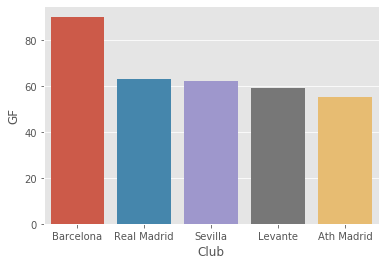

In [24]:
## use sort_values on GF
display(league_table_df.sort_values(by='GF', ascending=False)[:5][['Club', 'GF']])

## visualize the data
sns.barplot(x='Club', y='GF', data=league_table_df.sort_values(by='GF', ascending=False)[:5])

~ *Barcelona* has scored the highest number of goals in the season *90 goals*. *Levante* joining the top five spot at *fourth* position above *Ath Madrid* which is at *fifth spot*, and the other two teams were *Real Madrid* at *second* spot and *Sevilla* at *third* spot.

* Top five teams with least number of goals.

,Club,GF
15,Valladolid,32
17,Girona,37
12,Leganes,37
8,Alaves,39
19,Vallecano,41


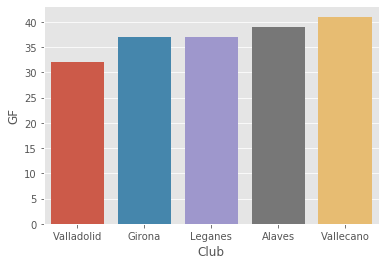

In [25]:
## use sort_values on GF, ascending will remain True
display(league_table_df.sort_values(by='GF')[:5][['Club', 'GF']])

## visualize the data
sns.barplot(x='Club', y='GF', data=league_table_df.sort_values(by='GF')[:5])

~ *Valladolid* has scored the least number of goals in the season *32 goals*. *Girona* and *Leganes* draws equal at *37 goals*. *Alaves* and *Vallecano* at *fourth* and *fifth* spot with *39* and *41 goals* respectively.

* Top five teams which conceded most number of goals.

,Club,GA
19,Vallecano,70
14,Levante,66
18,Huesca,65
16,Celta,62
17,Girona,53


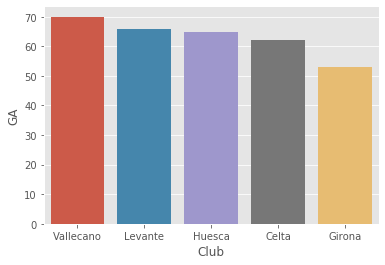

In [26]:
## use sort_values on GA
display(league_table_df.sort_values(by='GA', ascending=False)[:5][['Club', 'GA']])

## visualize the data
sns.barplot(x='Club', y='GA', data=league_table_df.sort_values(by='GA', ascending=False)[:5])

~ *Vallecano* has conceded the most number of goals - *70 goals*. The other teams joining the tally are: *Levante* at *second* spot with *66 goals*, *Huesca* at *third* spot with *65 goals*, *Celta* at *fouth* spot with *62 goals* and *Girona* at fifth with *53 goals*.

* Top five teams which conceded least number of goals.

,Club,GA
1,Ath Madrid,29
3,Valencia,35
4,Getafe,35
0,Barcelona,36
12,Leganes,43


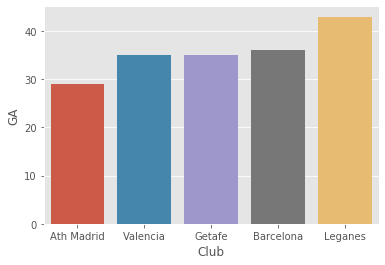

In [27]:
## use sort_values on GA, ascending will remain True
display(league_table_df.sort_values(by='GA')[:5][['Club', 'GA']])

## visualize the data
sns.barplot(x='Club', y='GA', data=league_table_df.sort_values(by='GA')[:5])

~ *Ath Madrid* leading the tally with *29 goals*. Following it are: *Valencia* and *Getafe* drawing equal at *35 goals*, *Barcelona* at *fourth* with *36 goals* and *Leganes* at *fifth* with *43 goals*.

* Top five teams with most clean sheets.

,Club,CS
1,Ath Madrid,20
0,Barcelona,17
3,Valencia,13
4,Getafe,13
2,Real Madrid,12


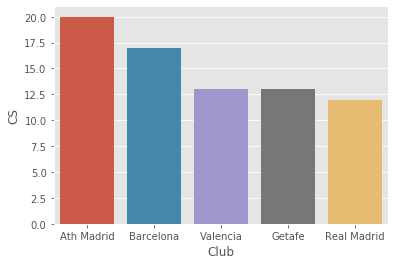

In [28]:
## use sort_values on CS
display(league_table_df.sort_values(by='CS', ascending=False)[:5][['Club', 'CS']])

## visualize the data
sns.barplot(x='Club', y='CS', data=league_table_df.sort_values(by='CS', ascending=False)[:5])

~ *Ath Madrid* has the most clean sheets with *20*. Following them are *Barcelona* with *17 clean sheets*. At *third* we have *Valencia* with *13 clean sheets*. *Getafe* is at *fourth* spot with *13 clean sheets* and *Real Madrid* on *fifth spot* with *12 clean sheets*.

* Conclusion Drawn From Above Analysis :-
    * In the tally of most number of goals we see *Levante* in the top five spot(at number four), but it's really strange to see that *Levante* not making under top ten spot(in the league table), well the reason is their defense. *Levante conceded 66 goals* coming at second position(for the team which conceded the most number of goals). So the reason for their great decline from scoring *fourth* most number of goals in the season but still ending up at *fifteenth* postion in the league is because of their defense.
    * Next what we see is *Valladolid* scoring the least number of goals but still not getting relegated at the end of the season, but the teams like *Girona, Huesca and Vallecano* scoring more goals than *Valladolid* getting relegated at the end of the season. Again the answer lies in the defense. You see the teams like *Girona and Vallacano* were in the top five spot for conceding most number of goals, but the teams like *Leganes* conceded less number of goals then these teams. That is the reason why *Valladolid, Alaves and Leganes* despite  scoring the least number of goals still ended up not being relegated, with *Valladolid* at *16th position*, *Leganes* at *13th position* and *Alaves* at *9th position*, even above than *Levante* in the league table(*Levante* being the team which was in top five spot for scoring most number of goals).
    * Well the above two points shows the power of defense, i.e. if you defend right not only you can save your team from relegation but can also help your team to finish at good position in the league.
    * Another thing which we saw in our analysis is that the team that conceded most goals in the season ended up either being relegated or at around bottom places in the league table and the teams which conceded less or have most clean sheets were at good position in the league table.

* Average goals scored by each team in each halfs.

In [29]:
## function to find average of goals scored/conceded by each team
def fill_goals(df, home, away, title):
    table = dict()
    
    ## iterate though club and fill in the values in table dictionary
    for club in clubs:
        goals = 0
        
        for i in range(len(df)):
            if df.iloc[i]['HomeTeam'] == club:
                goals += df.iloc[i][home]
            
            elif df.iloc[i]['AwayTeam'] == club:
                goals += df.iloc[i][away]

        table[club] = {title: goals / 38.0}
    
    return table

In [30]:
## parameters value 
home = 'HTHG'
away = 'HTAG'
title = 'Avg First Half Goals Scored'

## calling the function fill_goals
team_goals_half = fill_goals(df=laliga, home=home, away=away, title=title)

## make a dataframe
team_goals_half = pd.DataFrame(team_goals_half)
## transpose the dataframe
team_goals_half = team_goals_half.transpose()

## reset index to have new column for Club
team_goals_half = team_goals_half.rename_axis('Club').reset_index()
## sort the dataframe by Difference
team_goals_half.sort_values(by=title, ascending=False, inplace=True)

## reset index 
team_goals_half.reset_index(inplace=True)
team_goals_half.drop('index', axis=1, inplace=True)

In [31]:
## parameters value 
home = 'SHHG'
away = 'SHAG'
title = 'Avg Second Half Goals Scored'

## calling the function fill_goals
team_goals_full = fill_goals(df=laliga, home=home, away=away, title=title)

## make a dataframe
team_goals_full = pd.DataFrame(team_goals_full)
## transpose the dataframe
team_goals_full = team_goals_full.transpose()

## reset index to have new column for Club
team_goals_full = team_goals_full.rename_axis('Club').reset_index()
## sort the dataframe by Difference
team_goals_full.sort_values(by=title, ascending=False, inplace=True)

## reset index 
team_goals_full.reset_index(inplace=True)
team_goals_full.drop('index', axis=1, inplace=True)

In [32]:
## display the dataframes
multi_table([team_goals_half,team_goals_full])

,Club,Avg First Half Goals Scored
0,Barcelona,0.973684
1,Levante,0.684211
2,Valencia,0.684211
3,Real Madrid,0.631579
4,Vallecano,0.605263
5,Ath Bilbao,0.605263
6,Espanol,0.605263
7,Sociedad,0.578947
8,Ath Madrid,0.578947
9,Girona,0.552632


* Average goals conceded by each team in each halfs.

In [33]:
## parameters value 
home = 'HTAG'
away = 'HTHG'
title = 'Avg First Half Goals Conceded'

## calling the function fill_goals
goals_conceded_half = fill_goals(df=laliga, home=home, away=away, title=title)

## make a dataframe
goals_conceded_half = pd.DataFrame(goals_conceded_half)
## transpose the dataframe
goals_conceded_half = goals_conceded_half.transpose()

## reset index to have new column for Club
goals_conceded_half = goals_conceded_half.rename_axis('Club').reset_index()
## sort the dataframe by Difference
goals_conceded_half.sort_values(by=title, ascending=False, inplace=True)

## reset index 
goals_conceded_half.reset_index(inplace=True)
goals_conceded_half.drop('index', axis=1, inplace=True)

In [34]:
## parameters value 
home = 'SHAG'
away = 'SHHG'
title = 'Avg Second Half Goals Conceded'

## calling the function fill_goals
goals_conceded_full = fill_goals(df=laliga, home=home, away=away, title=title)

## make a dataframe
goals_conceded_full = pd.DataFrame(goals_conceded_full)
## transpose the dataframe
goals_conceded_full = goals_conceded_full.transpose()

## reset index to have new column for Club
goals_conceded_full = goals_conceded_full.rename_axis('Club').reset_index()
## sort the dataframe by Difference
goals_conceded_full.sort_values(by=title, ascending=False, inplace=True)

## reset index 
goals_conceded_full.reset_index(inplace=True)
goals_conceded_full.drop('index', axis=1, inplace=True)

In [35]:
## display the dataframes
multi_table([goals_conceded_half,goals_conceded_full])

,Club,Avg First Half Goals Conceded
0,Huesca,0.789474
1,Celta,0.684211
2,Vallecano,0.684211
3,Betis,0.657895
4,Real Madrid,0.631579
5,Alaves,0.605263
6,Levante,0.605263
7,Eibar,0.605263
8,Sevilla,0.578947
9,Sociedad,0.578947


* Win, Draw and Lose Percentage of each and every team.

In [126]:
## function to find average of goals scored/conceded by each team
def fill_percent(df, result, title):
    table = dict()
    
    ## iterate though club and fill in the values in table dictionary
    for club in clubs:
        win, draw, lose = 0, 0, 0
        
        for i in range(len(df)):
            if df.iloc[i]['HomeTeam'] == club:
                if df.iloc[i][result] == 'H':
                    win += 1
                elif df.iloc[i][result] == 'D':
                    draw += 1
                else:
                    lose += 1
            
            elif df.iloc[i]['AwayTeam'] == club:
                if df.iloc[i][result] == 'A':
                    win += 1
                elif df.iloc[i][result] == 'D':
                    draw += 1
                else:
                    lose += 1
        
        win = (win / 38.0) * 100
        draw = (draw / 38.0) * 100
        lose = (lose / 38.0) * 100
        
        table[club] =  {'W': win, 'D': draw, 'L': lose}
    
    return table

In [127]:
## calling the function fill_percent
first_half = fill_percent(df=laliga, result='HTR', title='First Half')
second_half = fill_percent(df=laliga, result='SHR', title='Second Half')
full_time = fill_percent(df=laliga, result='FTR', title='Full Time')

In [128]:
def fill_result(result_dict, param):
    result_list = []
    for i in result_dict:
        result_list.append(result_dict[i][param])
    return result_list

first_half_win_result = fill_result(result_dict=first_half, param='W')
first_half_draw_result = fill_result(result_dict=first_half, param='D')
first_half_lose_result = fill_result(result_dict=first_half, param='L')

second_half_win_result = fill_result(result_dict=second_half, param='W')
second_half_draw_result = fill_result(result_dict=second_half, param='D')
second_half_lose_result = fill_result(result_dict=second_half, param='L')

full_time_win_result = fill_result(result_dict=full_time, param='W')
full_time_draw_result = fill_result(result_dict=full_time, param='D')
full_time_lose_result = fill_result(result_dict=full_time, param='L')

In [129]:
table_columns = pd.MultiIndex.from_product([['First Half','Second Half','Full Time'], ['W','D','L']])
team_stat = pd.DataFrame(columns=table_columns)
team_stat.insert(loc=0, column='Clubs', value=clubs)
team_stat.fillna(0,inplace=True)
team_stat = team_stat.transpose()

In [130]:
team_stat.loc['First Half', 'W'] = first_half_win_result
team_stat.loc['First Half', 'D'] = first_half_draw_result
team_stat.loc['First Half', 'L'] = first_half_lose_result

team_stat.loc['Second Half', 'W'] = second_half_win_result
team_stat.loc['Second Half', 'D'] = second_half_draw_result
team_stat.loc['Second Half', 'L'] = second_half_lose_result

team_stat.loc['Full Time', 'W'] = full_time_win_result
team_stat.loc['Full Time', 'D'] = full_time_draw_result
team_stat.loc['Full Time', 'L'] = full_time_lose_result

In [141]:
team_stat = team_stat.transpose()

In [145]:
team_stat

Clubs First Half                   Second Half                    \
                         W        D        L           W        D        L   
0         Betis    15.7895  42.1053  42.1053     39.4737  31.5789  28.9474   
1        Girona    28.9474       50  21.0526     13.1579  34.2105  52.6316   
2     Barcelona    47.3684  39.4737  13.1579     60.5263  31.5789  7.89474   
3         Celta    26.3158  34.2105  39.4737     34.2105  23.6842  42.1053   
4    Villarreal    15.7895  57.8947  26.3158     34.2105  28.9474  36.8421   
5         Eibar    18.4211  47.3684  34.2105     44.7368  21.0526  34.2105   
6   Real Madrid    36.8421  34.2105  28.9474     44.7368  34.2105  21.0526   
7     Vallecano    34.2105  34.2105  31.5789     15.7895  31.5789  52.6316   
8    Ath Bilbao    34.2105  44.7368  21.0526     26.3158  34.2105  39.4737   
9      Valencia    39.4737  44.7368  15.7895     28.9474  42.1053  28.9474   
10       Getafe    26.3158  52.6316  21.0526     31.5789  44.7368  23.6842   
11      Leganes    26.3158  42.1053  31.5789     28.9474  34.2105  36.8421   
12       Alaves    23.6842  42.1053  34.2105     28.9474  36.8421  34.2105   
13   Ath Madrid    34.2105  52.6316  13.1579     52.6316  23.6842  23.6842   
14   Valladolid    15.7895  47.3684  36.8421     26.3158  39.4737  34.2105   
15      Espanol    42.1053  39.4737  18.4211     31.5789  21.0526  47.3684   
16      Sevilla    23.6842  42.1053  34.2105     42.1053  34.2105  23.6842   
17      Levante    39.4737  28.9474  31.5789     36.8421  18.4211  44.7368   
18       Huesca    15.7895  36.8421  47.3684     26.3158  39.4737  34.2105   
19     Sociedad    28.9474  39.4737  31.5789     28.9474  42.1053  28.9474   

   Full Time                    
           W        D        L  
0    36.8421  21.0526  42.1053  
1    23.6842  26.3158       50  
2    68.4211  23.6842  7.89474  
3    26.3158  28.9474  44.7368  
4    26.3158  36.8421  36.8421  
5    28.9474  36.8421  34.2105  
6    55.2632  13.1579  31.5789  
7    21.0526  21.0526  57.8947  
8    34.2105  36.8421  28.9474  
9    39.4737  42.1053  18.4211  
10   39.4737  36.8421  23.6842  
11   28.9474  31.5789  39.4737  
12   34.2105  28.9474  36.8421  
13   57.8947  26.3158  15.7895  
14   26.3158  28.9474  44.7368  
15   36.8421  28.9474  34.2105  
16   44.7368  21.0526  34.2105  
17   28.9474  28.9474  42.1053  
18   18.4211  31.5789       50  
19   34.2105  28.9474  36.8421

* Top five teams with most number of home wins. away wins, home loss, away losss

In [148]:
def home_away_wins(df):
    home_dict = {}
    away_dict = {}
    for club in clubs:
        home, away = 0, 0
        for i in range(len(df)):
            if df.iloc[i]['HomeTeam'] == club and df.iloc[i]['FTR'] == 'H':
                home += 1
            if df.iloc[i]['AwayTeam'] == club and df.iloc[i]['FTR'] == 'A':
                away += 1
        home_dict[club] = home
        away_dict[club] = away
    
    return (home_dict, away_dict)

In [169]:
def home_away_loss(df):
    home_dict = {}
    away_dict = {}
    for club in clubs:
        home, away = 0, 0
        for i in range(len(df)):
            if df.iloc[i]['HomeTeam'] == club and df.iloc[i]['FTR'] == 'A':
                home += 1
            if df.iloc[i]['AwayTeam'] == club and df.iloc[i]['FTR'] == 'H':
                away += 1
        home_dict[club] = home
        away_dict[club] = away
    
    return (home_dict, away_dict)

In [153]:
home_wins, away_wins = home_away_wins(df=laliga)

In [170]:
home_loss, away_loss = home_away_loss(df=laliga)

In [174]:
pd.Series(home_wins).sort_values(ascending=False)

Barcelona      15
Ath Madrid     15
Real Madrid    13
Sevilla        12
Espanol        11
Getafe         11
Ath Bilbao      9
Eibar           9
Betis           8
Celta           8
Sociedad        7
Leganes         7
Alaves          7
Valencia        7
Levante         6
Huesca          5
Vallecano       5
Villarreal      5
Valladolid      5
Girona          3
dtype: int64

In [175]:
pd.Series(away_wins).sort_values(ascending=False)

Barcelona      11
Valencia        8
Real Madrid     8
Ath Madrid      7
Girona          6
Alaves          6
Sociedad        6
Betis           6
Valladolid      5
Villarreal      5
Sevilla         5
Levante         5
Leganes         4
Getafe          4
Ath Bilbao      4
Vallecano       3
Espanol         3
Huesca          2
Eibar           2
Celta           2
dtype: int64

In [176]:
pd.Series(home_loss).sort_values(ascending=False)

Girona         10
Valladolid      9
Huesca          8
Vallecano       8
Sociedad        6
Celta           6
Villarreal      6
Betis           6
Levante         6
Getafe          5
Real Madrid     5
Espanol         5
Leganes         4
Alaves          4
Eibar           4
Sevilla         4
Ath Bilbao      2
Valencia        2
Ath Madrid      1
Barcelona       1
dtype: int64

In [177]:
pd.Series(away_loss).sort_values(ascending=False)

Vallecano      14
Celta          11
Leganes        11
Huesca         11
Betis          10
Levante        10
Alaves         10
Sevilla         9
Girona          9
Eibar           9
Ath Bilbao      9
Villarreal      8
Sociedad        8
Valladolid      8
Espanol         8
Real Madrid     7
Ath Madrid      5
Valencia        5
Getafe          4
Barcelona       2
dtype: int64

### *Slothfulwave612...*